## Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset & Data Overview

In [2]:
df = pd.read_csv("/content/Bikes_Dataset.csv")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
0,1/1/2011 0:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,218.729224
1,1/1/2011 1:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40,549.829224
2,1/1/2011 2:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32,433.729224
3,1/1/2011 3:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13,180.029224
4,1/1/2011 4:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,12.329224


## Data Describe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  profit              10886 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1020.7+ KB


In [5]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
count,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132,2625.629931
std,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454,2489.939816
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000,12.329224
25%,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000,571.329224
50%,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000,1977.429224
75%,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000,3912.429224
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000,13234.829220


In [6]:
df.shape

(10886, 12)

In [7]:
df.duplicated().sum()

0

## Dealing With Data Type (Date Time)

In [8]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  profit              10886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 1020.7+ KB


In [10]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["week"] = df["datetime"].dt.week
df["day"] = df["datetime"].dt.day_name()
df["hour"] = df["datetime"].dt.hour

<ipython-input-10-a4ca89048fd2>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = df["datetime"].dt.week


In [11]:
def day_period(hour):
  if hour in range(6,12):
    return "morning"
  elif hour in range(13,19):
    return "afternoon"
  else:
    return "evening"

df["day_period"] = df["hour"].apply(day_period)


In [12]:
def holiday(day):
  if day in ["Saturday", "Sunday"]:
    return 1
  else:
    return 0

df["holiday"] = df["day"].apply(holiday)

In [13]:
def season(month):
  if month in range(12,2):
    return "winter"
  elif month in range(3,5):
    return "spring"
  elif month in range(6,8):
    return "summer"
  else:
    return "autumn"

df["season"] = df["month"].apply(season)

In [14]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,year,month,week,day,hour,day_period
0,2011-01-01 00:00:00,autumn,1,0.0,Clear,9.84,81.0,NaN,3,13,16,218.729224,2011,1,52,Saturday,0,evening
1,2011-01-01 01:00:00,autumn,1,0.0,NaN,9.02,80.0,0.0,8,32,40,549.829224,2011,1,52,Saturday,1,evening
2,2011-01-01 02:00:00,autumn,1,0.0,Clear,9.02,NaN,0.0,5,27,32,433.729224,2011,1,52,Saturday,2,evening
3,2011-01-01 03:00:00,autumn,1,0.0,Clear,9.84,75.0,0.0,3,10,13,180.029224,2011,1,52,Saturday,3,evening
4,2011-01-01 04:00:00,autumn,1,0.0,Clear,NaN,75.0,NaN,0,1,1,12.329224,2011,1,52,Saturday,4,evening


## Dealing With Missing Values

In [15]:
df.isna().sum().sort_values(ascending = False)

windspeed             4066
humidity              3424
temp                  2782
weather               2140
workingday            1498
datetime                 0
year                     0
hour                     0
day                      0
week                     0
month                    0
registered               0
profit                   0
rented_bikes_count       0
season                   0
casual                   0
holiday                  0
day_period               0
dtype: int64

In [16]:
df.drop(columns = ["windspeed", "workingday"], inplace = True)

In [17]:
df["humidity"].fillna(method = "ffill", inplace = True)
df["temp"].fillna(method = "ffill", inplace = True)
df["weather"].fillna(method = "ffill", inplace = True)

In [18]:
df.isna().sum()

datetime              0
season                0
holiday               0
weather               0
temp                  0
humidity              0
casual                0
registered            0
rented_bikes_count    0
profit                0
year                  0
month                 0
week                  0
day                   0
hour                  0
day_period            0
dtype: int64

In [19]:
df.head()

,datetime,season,holiday,weather,temp,humidity,casual,registered,rented_bikes_count,profit,year,month,week,day,hour,day_period
0,2011-01-01 00:00:00,autumn,1,Clear,9.84,81.0,3,13,16,218.729224,2011,1,52,Saturday,0,evening
1,2011-01-01 01:00:00,autumn,1,Clear,9.02,80.0,8,32,40,549.829224,2011,1,52,Saturday,1,evening
2,2011-01-01 02:00:00,autumn,1,Clear,9.02,80.0,5,27,32,433.729224,2011,1,52,Saturday,2,evening
3,2011-01-01 03:00:00,autumn,1,Clear,9.84,75.0,3,10,13,180.029224,2011,1,52,Saturday,3,evening
4,2011-01-01 04:00:00,autumn,1,Clear,9.84,75.0,0,1,1,12.329224,2011,1,52,Saturday,4,evening


In [20]:
df.describe(include=[np.number])

,holiday,temp,humidity,casual,registered,rented_bikes_count,profit,year,month,week,hour
count,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.290557,20.23892,61.913834,36.021955,155.552177,191.574132,2625.629931,2011.501929,6.521495,25.917784,11.541613
std,0.454040,7.79209,19.244617,49.960477,151.039033,181.144454,2489.939816,0.500019,3.444373,15.017269,6.915838
min,0.000000,0.82000,0.000000,0.000000,0.000000,1.000000,12.329224,2011.000000,1.000000,1.000000,0.000000
25%,0.000000,13.94000,47.000000,4.000000,36.000000,42.000000,571.329224,2011.000000,4.000000,14.000000,6.000000
50%,0.000000,20.50000,62.000000,17.000000,118.000000,145.000000,1977.429224,2012.000000,7.000000,26.000000,12.000000
75%,1.000000,26.24000,77.000000,49.000000,222.000000,284.000000,3912.429224,2012.000000,10.000000,40.000000,18.000000
max,1.000000,41.00000,100.000000,367.000000,886.000000,977.000000,13234.829220,2012.000000,12.000000,52.000000,23.000000


## Dealing With Outliers

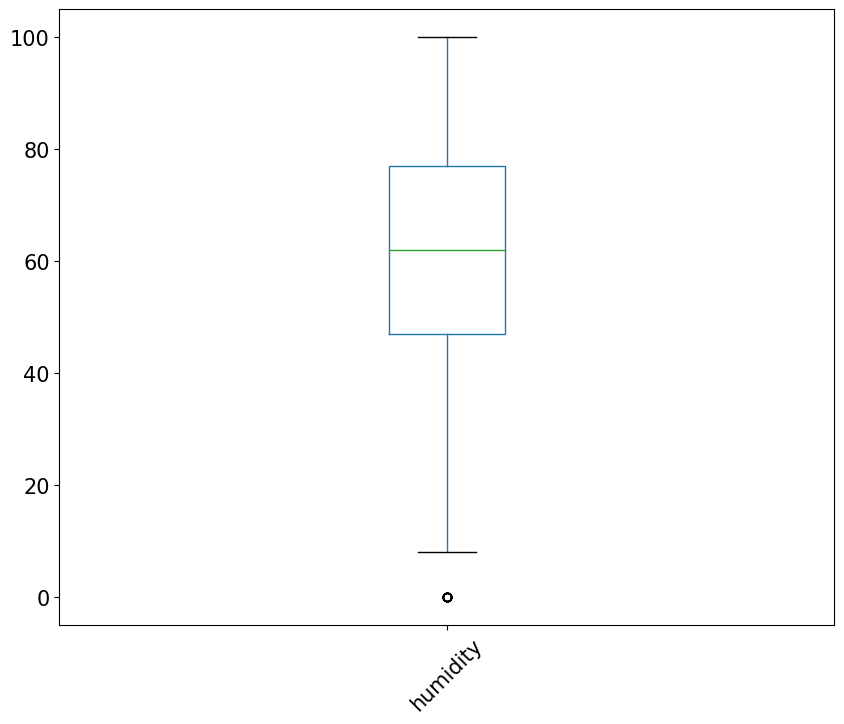

In [21]:
df[['humidity']].boxplot(figsize=(10, 8), fontsize=15, grid=False, rot=45);

In [22]:
df.loc[df['humidity'] < 1]

,datetime,season,holiday,weather,temp,humidity,casual,registered,rented_bikes_count,profit,year,month,week,day,hour,day_period
1091,2011-03-10 00:00:00,spring,0,Rainy,13.94,0.0,3,0,3,51.029224,2011,3,10,Thursday,0,evening
1092,2011-03-10 01:00:00,spring,0,Rainy,13.94,0.0,0,2,2,25.229224,2011,3,10,Thursday,1,evening
1093,2011-03-10 02:00:00,spring,0,Rainy,13.94,0.0,0,1,1,12.329224,2011,3,10,Thursday,2,evening
1094,2011-03-10 05:00:00,spring,0,Rainy,13.94,0.0,1,2,3,42.429224,2011,3,10,Thursday,5,evening
1095,2011-03-10 06:00:00,spring,0,Rainy,14.76,0.0,0,12,12,154.229224,2011,3,10,Thursday,6,morning
1096,2011-03-10 07:00:00,spring,0,Rainy,15.58,0.0,1,36,37,481.029224,2011,3,10,Thursday,7,morning
1097,2011-03-10 08:00:00,spring,0,Rainy,15.58,0.0,1,43,44,571.329224,2011,3,10,Thursday,8,morning
1098,2011-03-10 09:00:00,spring,0,Rainy,15.58,0.0,1,23,24,313.329224,2011,3,10,Thursday,9,morning
1099,2011-03-10 10:00:00,spring,0,Rainy,16.40,0.0,0,17,17,218.729224,2011,3,10,Thursday,10,morning
1100,2011-03-10 11:00:00,spring,0,Rainy,16.40,0.0,6,5,11,167.129224,2011,3,10,Thursday,11,morning


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_humidity = scaler.fit_transform(df['humidity'].values.reshape(-1, 1))

In [24]:
df['scaled_humidity'] = scaled_humidity

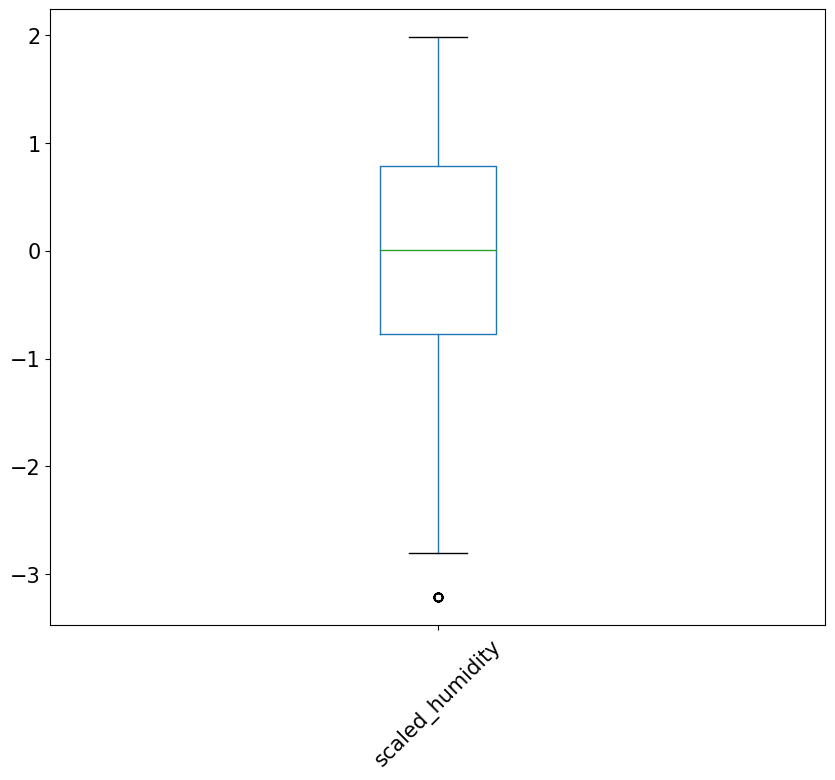

In [25]:
df[['scaled_humidity']].boxplot(figsize=(10, 8), fontsize=15, grid=False, rot=45);

In [26]:
outliers = np.where(df['scaled_humidity'] < -3)
outliers

(array([1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101,
        1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112]),)

In [27]:
df.iloc[outliers]

,datetime,season,holiday,weather,temp,humidity,casual,registered,rented_bikes_count,profit,year,month,week,day,hour,day_period,scaled_humidity
1091,2011-03-10 00:00:00,spring,0,Rainy,13.94,0.0,3,0,3,51.029224,2011,3,10,Thursday,0,evening,-3.217351
1092,2011-03-10 01:00:00,spring,0,Rainy,13.94,0.0,0,2,2,25.229224,2011,3,10,Thursday,1,evening,-3.217351
1093,2011-03-10 02:00:00,spring,0,Rainy,13.94,0.0,0,1,1,12.329224,2011,3,10,Thursday,2,evening,-3.217351
1094,2011-03-10 05:00:00,spring,0,Rainy,13.94,0.0,1,2,3,42.429224,2011,3,10,Thursday,5,evening,-3.217351
1095,2011-03-10 06:00:00,spring,0,Rainy,14.76,0.0,0,12,12,154.229224,2011,3,10,Thursday,6,morning,-3.217351
1096,2011-03-10 07:00:00,spring,0,Rainy,15.58,0.0,1,36,37,481.029224,2011,3,10,Thursday,7,morning,-3.217351
1097,2011-03-10 08:00:00,spring,0,Rainy,15.58,0.0,1,43,44,571.329224,2011,3,10,Thursday,8,morning,-3.217351
1098,2011-03-10 09:00:00,spring,0,Rainy,15.58,0.0,1,23,24,313.329224,2011,3,10,Thursday,9,morning,-3.217351
1099,2011-03-10 10:00:00,spring,0,Rainy,16.40,0.0,0,17,17,218.729224,2011,3,10,Thursday,10,morning,-3.217351
1100,2011-03-10 11:00:00,spring,0,Rainy,16.40,0.0,6,5,11,167.129224,2011,3,10,Thursday,11,morning,-3.217351


In [28]:
df_outliers_removed = df.drop(df.index[outliers])

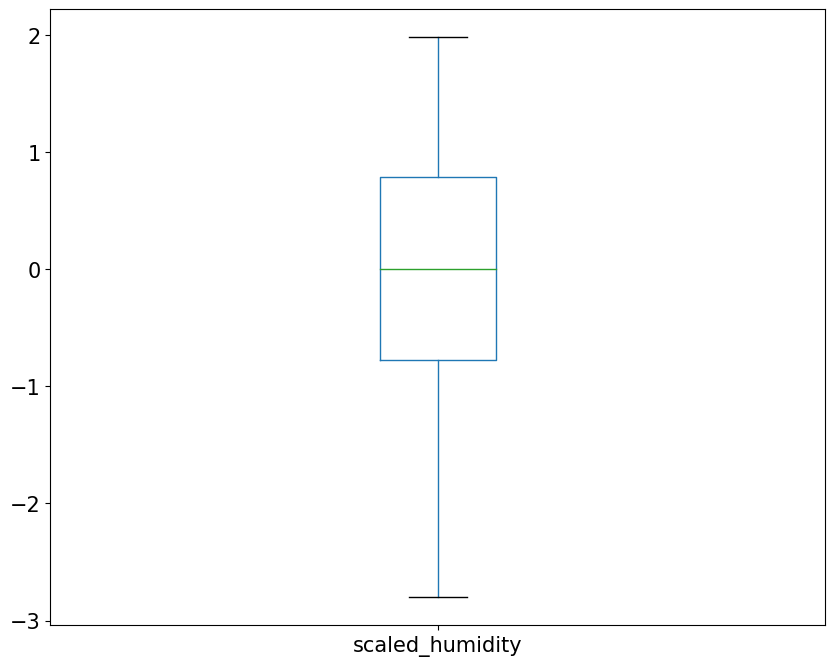

In [29]:
df_outliers_removed.boxplot(figsize=(10, 8), grid=False,
                                        fontsize=15, column=['scaled_humidity']);

In [30]:
df.drop(columns = ["humidity"], inplace = True)

## Analysis Question

### Realation Between Year & Profit

<Axes: title={'center': 'Realation Between Year & Profit'}, xlabel='year', ylabel='profit'>

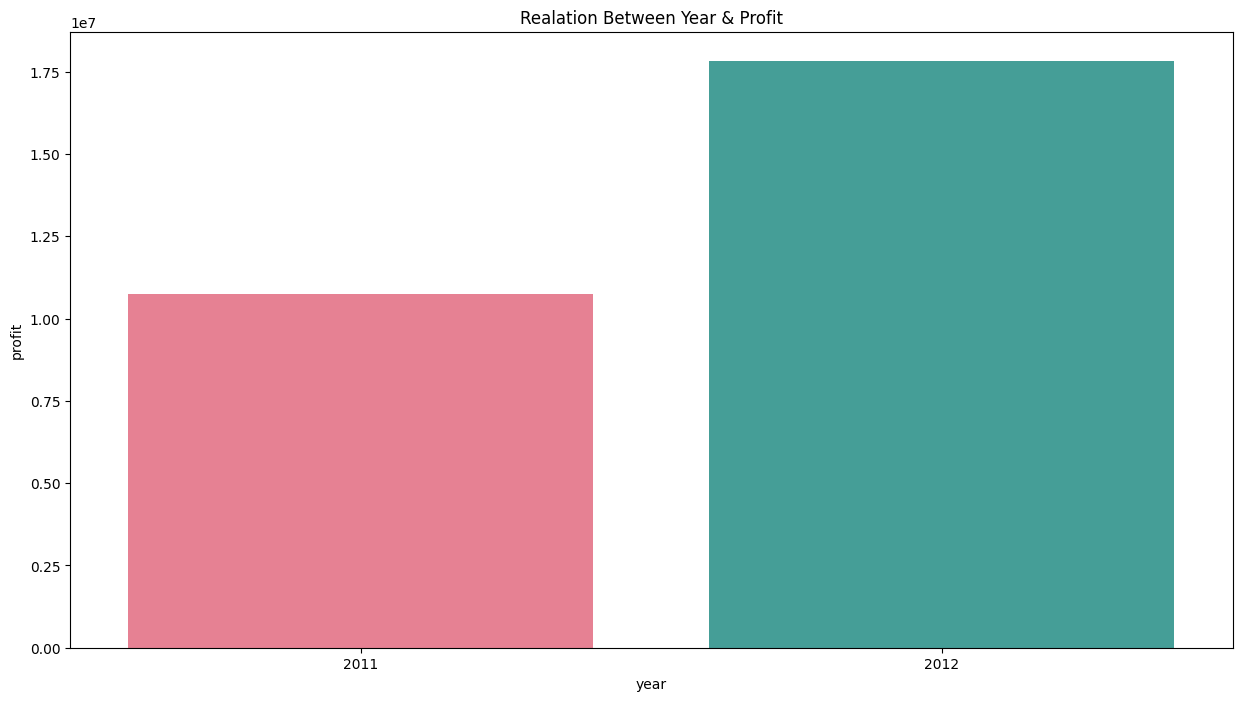

In [31]:
y = df.groupby("year")[["profit"]].sum()
plt.figure(figsize = [15,8])
plt.title('Realation Between Year & Profit')
sns.barplot(data=df, x=y.index, y=y.profit, palette = "husl")

### Realation Between Month & Profit

<Axes: title={'center': 'Realation Between Month & Profit'}, xlabel='month', ylabel='profit'>

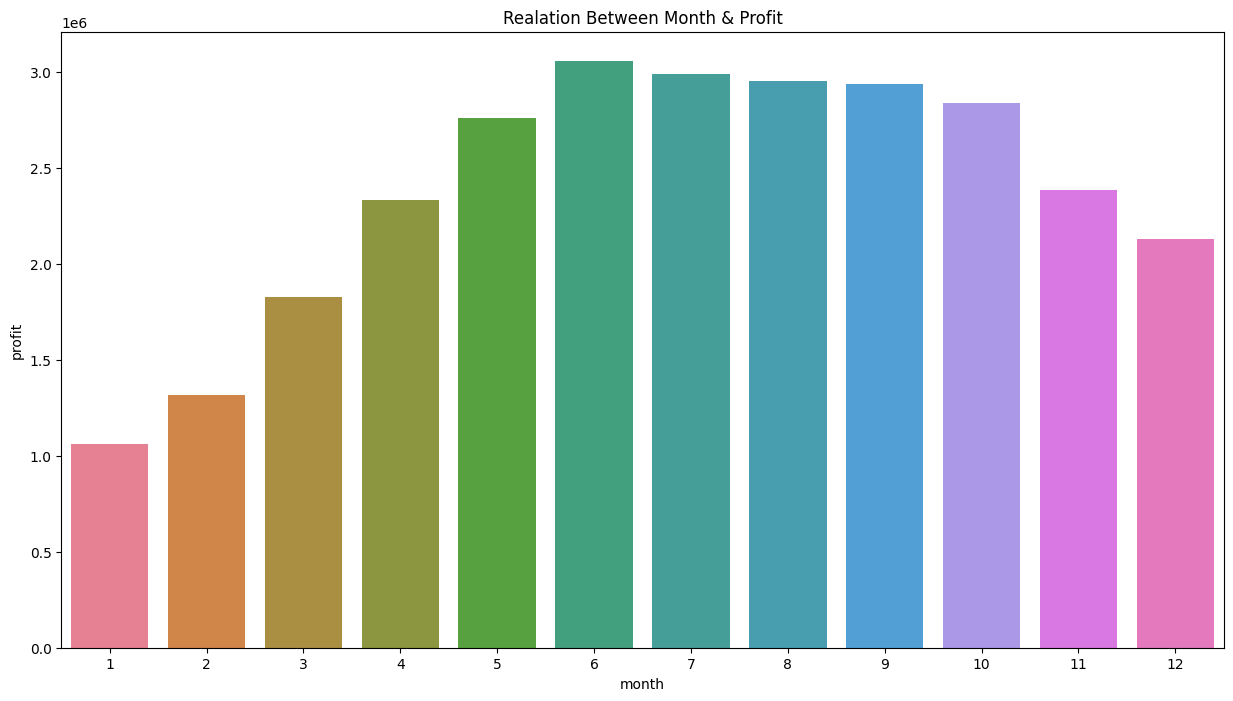

In [32]:
m = df.groupby("month")[["profit"]].sum()
plt.figure(figsize = [15,8])
plt.title('Realation Between Month & Profit')
sns.barplot(data=df, x = m.index, y = m.profit, palette = "husl")

### Realation Between Week & Profit

<Axes: title={'center': 'Realation Between week & Profit'}, xlabel='week', ylabel='profit'>

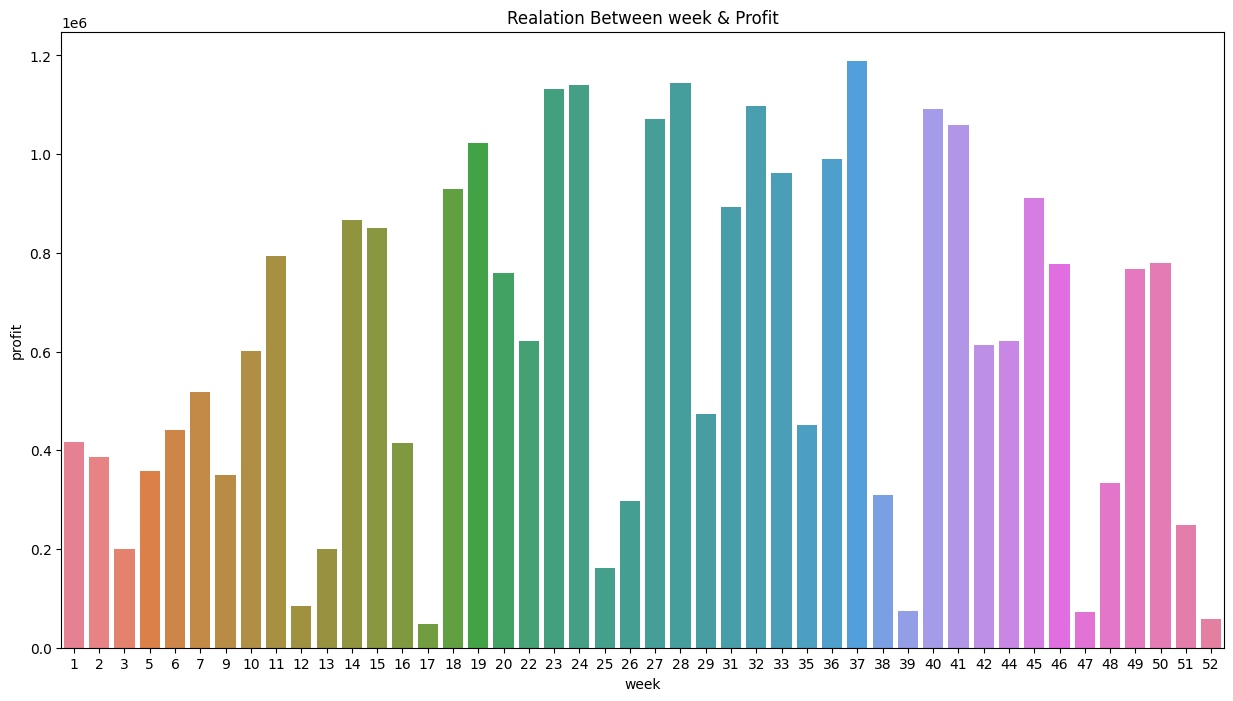

In [33]:
w = df.groupby("week")[["profit"]].sum()
plt.figure(figsize = [15,8])
plt.title('Realation Between week & Profit')
sns.barplot(data=df, x = w.index, y = w.profit, palette = "husl")

### Realation Between Day & Profit

<Axes: title={'center': 'Realation Between Day & Profit'}, xlabel='day', ylabel='profit'>

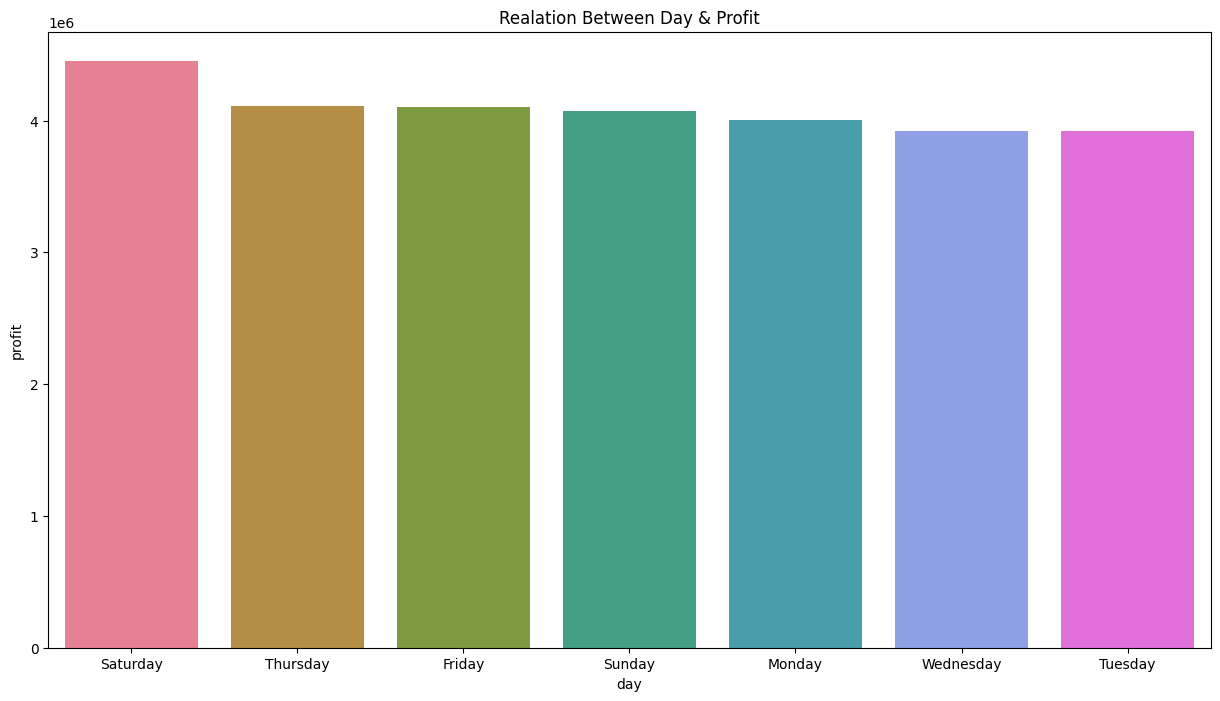

In [34]:
d = df.groupby("day")[["profit"]].sum().sort_values(by = "profit", ascending = False)
plt.figure(figsize = [15,8])
plt.title('Realation Between Day & Profit')
sns.barplot(data=df, x = d.index, y = d.profit, palette = "husl")


### Realation Between Hour & Profit

<Axes: title={'center': 'Realation Between Hour & Profit'}, xlabel='hour', ylabel='profit'>

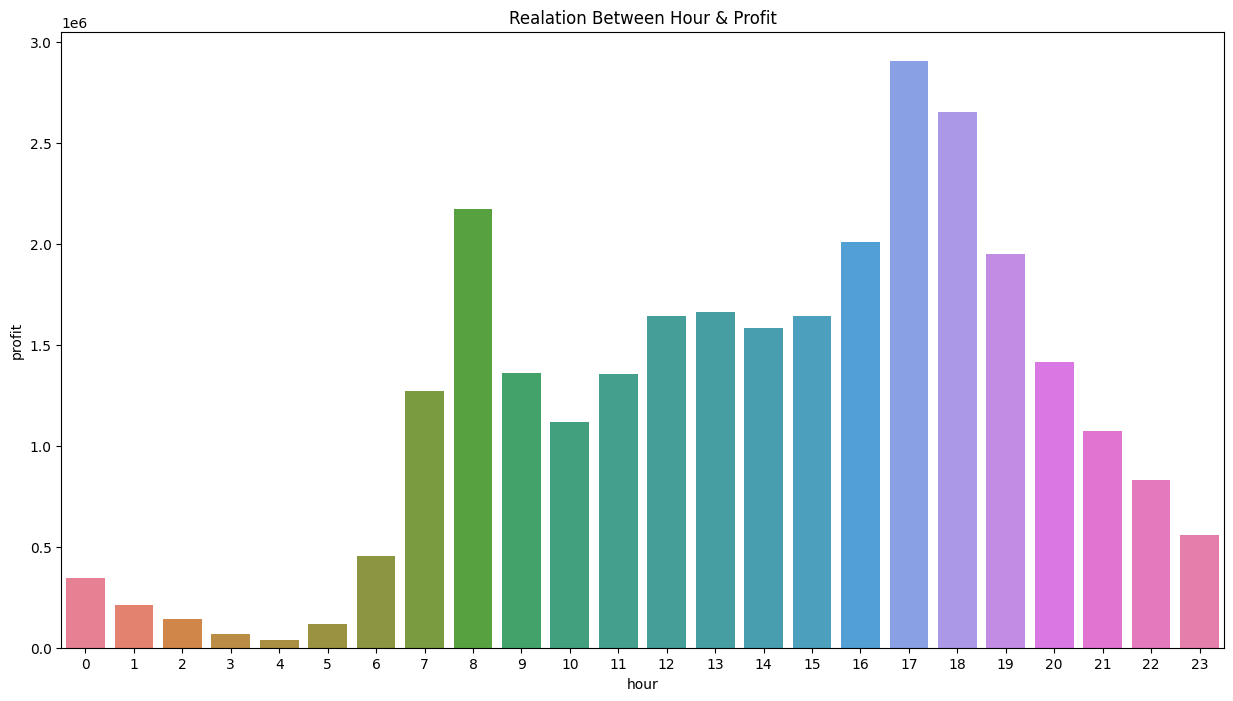

In [35]:
h = df.groupby("hour")[["profit"]].sum().sort_values(by = "profit", ascending = False)
plt.figure(figsize = [15,8])
plt.title('Realation Between Hour & Profit')
sns.barplot(data=df, x = h.index, y = h.profit, palette = "husl")

### Realation Between Day_Period & Profit

<Axes: title={'center': 'Realation Between Day_Period & Profit'}, xlabel='day_period', ylabel='profit'>

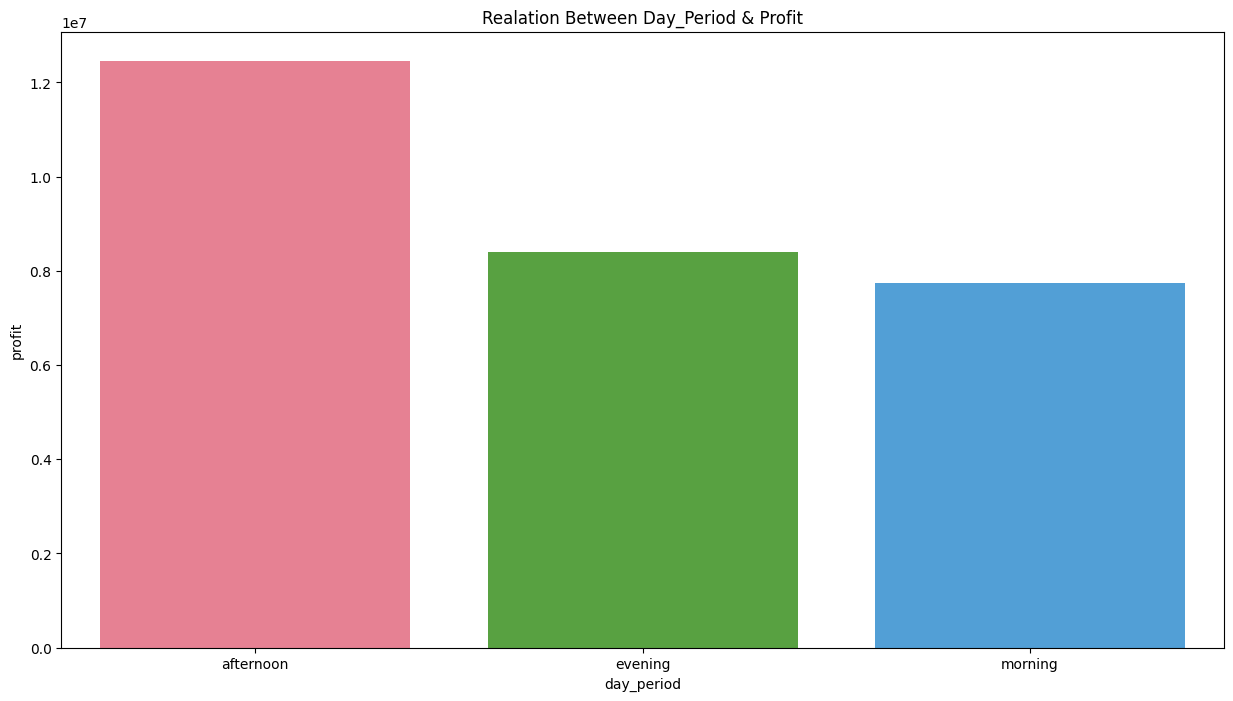

In [36]:
dp = df.groupby("day_period")[["profit"]].sum().sort_values(by = "profit", ascending = False)
plt.figure(figsize = [15,8])
plt.title('Realation Between Day_Period & Profit')
sns.barplot(data=df, x =dp.index, y = dp.profit, palette = "husl")

### Realation Between Season & Profit

<Axes: title={'center': 'Realation Between Season & Profit'}, xlabel='season', ylabel='profit'>

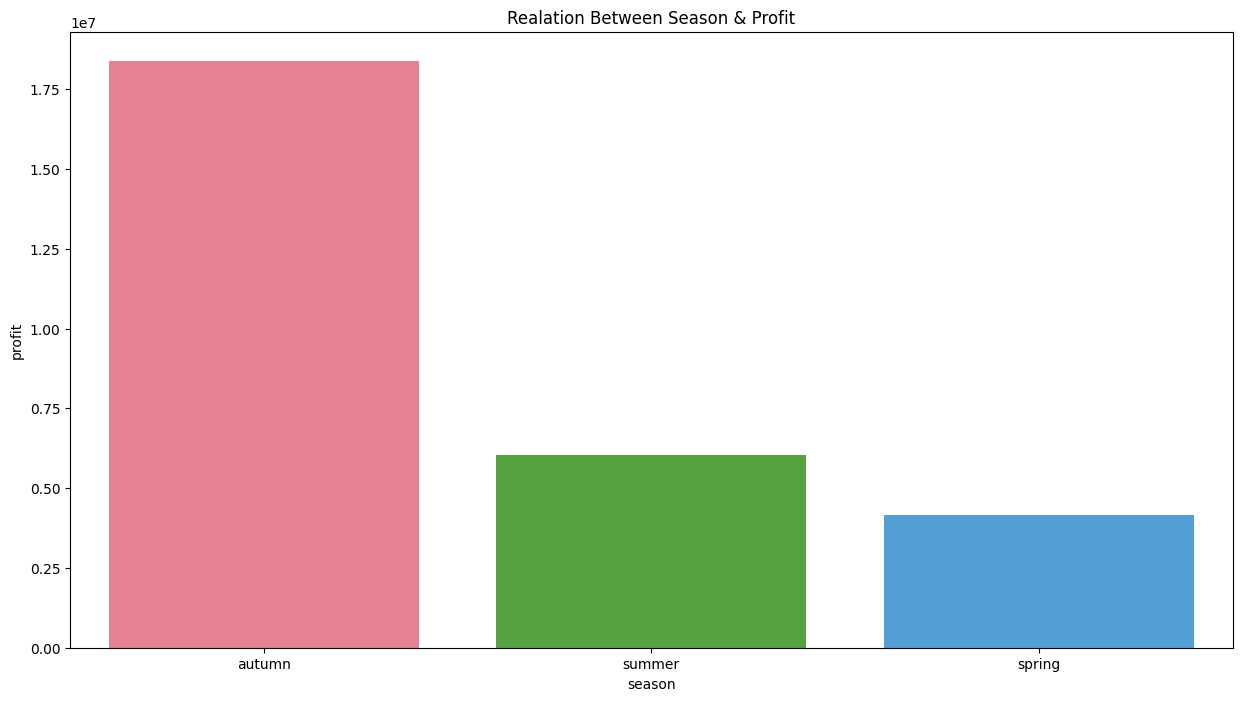

In [37]:
s = df.groupby("season")[["profit"]].sum().sort_values(by = "profit", ascending = False)
plt.figure(figsize = [15, 8])
plt.title('Realation Between Season & Profit')
sns.barplot(data = df, x = s.index, y = s.profit, palette = "husl")

### Realation Between Weather & Profit

<Axes: title={'center': 'Realation Between Weather & Profit'}, xlabel='weather', ylabel='profit'>

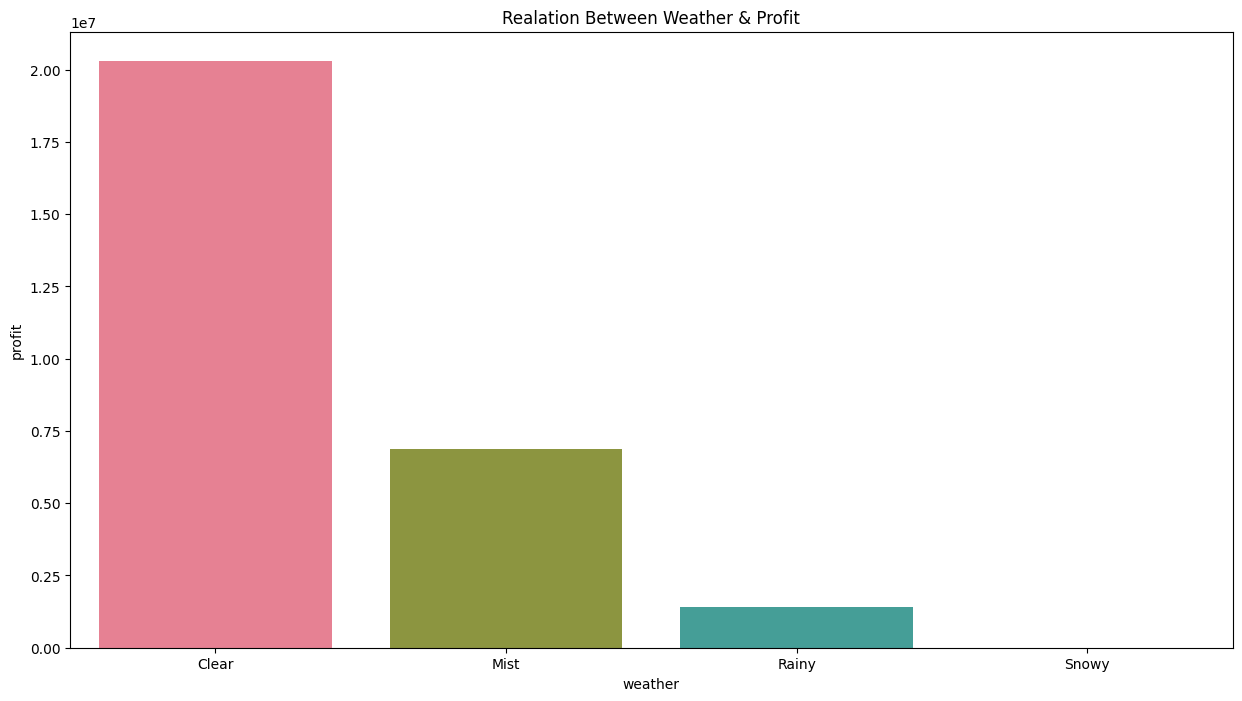

In [38]:
wtr = df.groupby("weather")[["profit"]].sum().sort_values(by = "profit", ascending = False)
plt.figure(figsize = [15, 8])
plt.title('Realation Between Weather & Profit')
sns.barplot(data = df, x = wtr.index, y = wtr.profit, palette = "husl")

### Correlation Between Data

<ipython-input-39-4f0aedb802da>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: title={'center': 'Correlation Between Data'}>

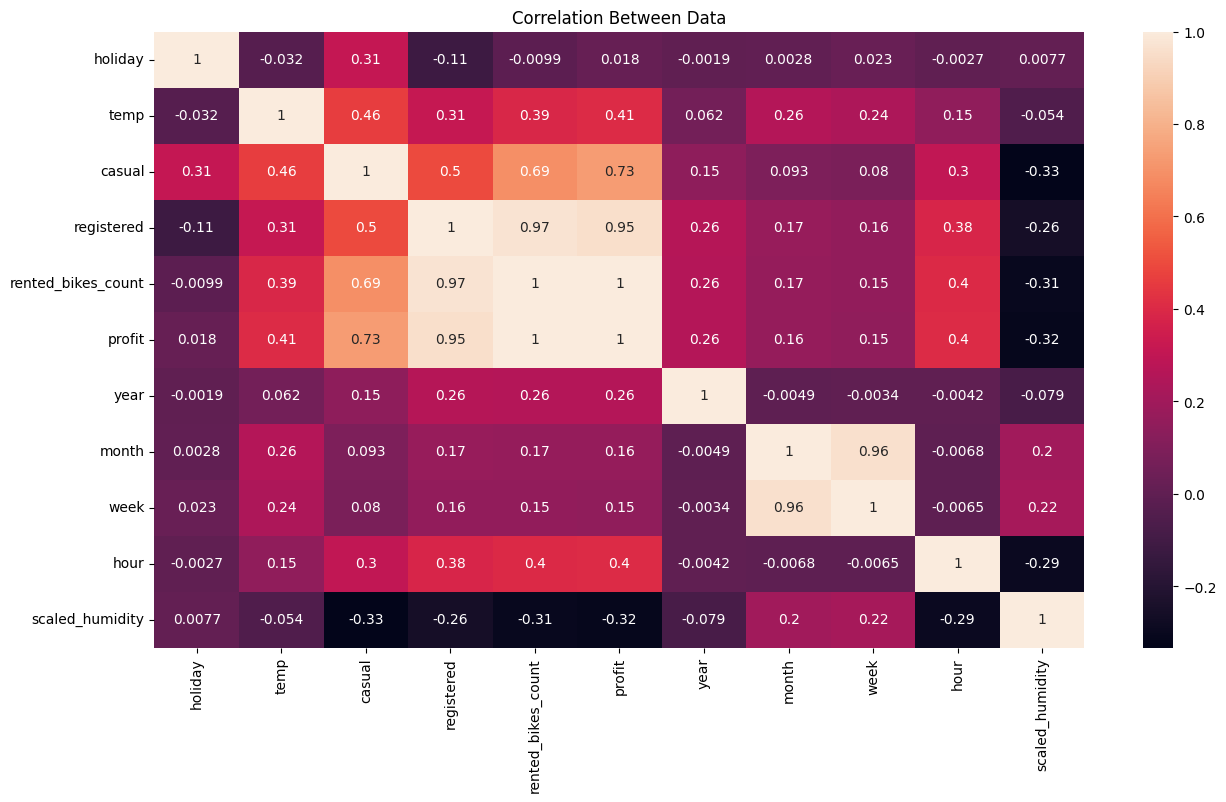

In [39]:
plt.figure(figsize = [15, 8])
plt.title("Correlation Between Data")
sns.heatmap(df.corr(), annot = True)

## Select Important Data

In [40]:
df.head()

,datetime,season,holiday,weather,temp,casual,registered,rented_bikes_count,profit,year,month,week,day,hour,day_period,scaled_humidity
0,2011-01-01 00:00:00,autumn,1,Clear,9.84,3,13,16,218.729224,2011,1,52,Saturday,0,evening,0.991812
1,2011-01-01 01:00:00,autumn,1,Clear,9.02,8,32,40,549.829224,2011,1,52,Saturday,1,evening,0.939847
2,2011-01-01 02:00:00,autumn,1,Clear,9.02,5,27,32,433.729224,2011,1,52,Saturday,2,evening,0.939847
3,2011-01-01 03:00:00,autumn,1,Clear,9.84,3,10,13,180.029224,2011,1,52,Saturday,3,evening,0.680022
4,2011-01-01 04:00:00,autumn,1,Clear,9.84,0,1,1,12.329224,2011,1,52,Saturday,4,evening,0.680022


In [41]:
df.columns

Index(['datetime', 'season', 'holiday', 'weather', 'temp', 'casual',
       'registered', 'rented_bikes_count', 'profit', 'year', 'month', 'week',
       'day', 'hour', 'day_period', 'scaled_humidity'],
      dtype='object')

In [43]:
df = df[["season", "holiday", "weather", "temp", "scaled_humidity", "year", "month", "week", "day", "hour", "day_period", "profit"]]

In [44]:
df.head()

,season,holiday,weather,temp,scaled_humidity,year,month,week,day,hour,day_period,profit
0,autumn,1,Clear,9.84,0.991812,2011,1,52,Saturday,0,evening,218.729224
1,autumn,1,Clear,9.02,0.939847,2011,1,52,Saturday,1,evening,549.829224
2,autumn,1,Clear,9.02,0.939847,2011,1,52,Saturday,2,evening,433.729224
3,autumn,1,Clear,9.84,0.680022,2011,1,52,Saturday,3,evening,180.029224
4,autumn,1,Clear,9.84,0.680022,2011,1,52,Saturday,4,evening,12.329224


In [45]:
df.describe()

,holiday,temp,scaled_humidity,year,month,week,hour,profit
count,10886.000000,10886.00000,1.088600e+04,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.290557,20.23892,-1.096557e-16,2011.501929,6.521495,25.917784,11.541613,2625.629931
std,0.454040,7.79209,1.000046e+00,0.500019,3.444373,15.017269,6.915838,2489.939816
min,0.000000,0.82000,-3.217351e+00,2011.000000,1.000000,1.000000,0.000000,12.329224
25%,0.000000,13.94000,-7.749970e-01,2011.000000,4.000000,14.000000,6.000000,571.329224
50%,0.000000,20.50000,4.477599e-03,2012.000000,7.000000,26.000000,12.000000,1977.429224
75%,1.000000,26.24000,7.839521e-01,2012.000000,10.000000,40.000000,18.000000,3912.429224
max,1.000000,41.00000,1.979146e+00,2012.000000,12.000000,52.000000,23.000000,13234.829220


## Split Data Into Features And Target

In [46]:
features = df.drop(columns = "profit")
target = df["profit"]

## Dealing With Categorical Data

In [47]:
features = pd.get_dummies(data = features, drop_first = True)

In [48]:
features.head()

,holiday,temp,scaled_humidity,year,month,week,hour,season_spring,season_summer,weather_Mist,weather_Rainy,weather_Snowy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_period_evening,day_period_morning
0,1,9.84,0.991812,2011,1,52,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,9.02,0.939847,2011,1,52,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,9.02,0.939847,2011,1,52,2,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,9.84,0.680022,2011,1,52,3,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,9.84,0.680022,2011,1,52,4,0,0,0,0,0,0,1,0,0,0,0,1,0


## Split Data Into Train And Test

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 7)

In [50]:
x_train

,holiday,temp,scaled_humidity,year,month,week,hour,season_spring,season_summer,weather_Mist,weather_Rainy,weather_Snowy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_period_evening,day_period_morning
10549,0,12.30,-0.878927,2012,12,49,23,0,0,0,0,0,0,0,0,0,0,1,1,0
9977,0,13.12,0.212337,2012,11,44,2,0,0,0,0,0,0,0,0,1,0,0,1,0
6883,0,17.22,-1.086787,2012,4,14,3,1,0,0,0,0,0,0,0,1,0,0,1,0
6493,0,22.14,-1.034822,2012,3,10,19,1,0,0,0,0,0,0,0,0,0,1,1,0
4243,1,21.32,0.316267,2011,10,40,20,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,0,24.60,0.576092,2011,10,41,12,0,0,1,0,0,0,0,0,0,1,0,1,0
5699,0,18.04,0.524127,2012,1,2,15,0,0,0,0,0,0,0,0,1,0,0,0,0
10742,0,10.66,0.108408,2012,12,50,0,0,0,0,0,0,0,0,0,0,0,0,1,0
537,1,9.02,1.979146,2011,2,5,13,0,0,0,1,0,0,1,0,0,0,0,0,0


In [51]:
y_train

10549      975.529224
9977       300.429224
6883        63.929224
6493      4725.129224
4243      2940.629224
             ...     
4307      2553.629224
5699      2562.229224
10742      622.929224
537        971.229224
9412     10487.129220
Name: profit, Length: 8708, dtype: float64

In [52]:
x_test

,holiday,temp,scaled_humidity,year,month,week,hour,season_spring,season_summer,weather_Mist,weather_Rainy,weather_Snowy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_period_evening,day_period_morning
3502,0,27.06,0.160373,2011,8,33,20,0,0,0,0,0,1,0,0,0,0,0,1,0
6462,0,10.66,-1.086787,2012,3,10,12,1,0,0,0,0,0,0,0,0,1,0,1,0
3275,1,27.06,0.420197,2011,8,31,9,0,0,0,0,0,0,1,0,0,0,0,0,1
3503,0,27.06,0.160373,2011,8,33,21,0,0,0,0,0,1,0,0,0,0,0,1,0
6813,0,16.40,0.731987,2012,4,14,5,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8674,0,32.80,-0.463207,2012,8,31,19,0,0,1,0,0,0,0,0,0,0,0,1,0
8764,0,32.80,-0.515172,2012,8,32,13,0,0,1,0,0,0,0,0,0,1,0,0,0
3760,0,25.42,1.667357,2011,9,36,15,0,0,0,1,0,0,0,0,0,0,1,0,0
39,1,13.94,0.472162,2011,1,52,16,0,0,0,1,0,0,0,1,0,0,0,0,0


In [53]:
y_test

3502    3869.429224
6462    1818.329224
3275    3030.929224
3503    2519.229224
6813     317.629224
           ...     
8674    6397.829224
8764    3555.529224
3760     760.529224
39      1018.529224
9116      55.329224
Name: profit, Length: 2178, dtype: float64

## Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [55]:
x_train_scaled = pd.DataFrame(data = x_train_scaled, columns = scaler.get_feature_names_out())
x_train_scaled

,holiday,temp,scaled_humidity,year,month,week,hour,season_spring,season_summer,weather_Mist,weather_Rainy,weather_Snowy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_period_evening,day_period_morning
0,-0.631566,-1.012418,-0.884758,0.996790,1.595829,1.545613,1.661696,-0.448446,-0.447152,-0.592204,-0.291735,-0.010717,-0.406332,-0.406524,-0.409014,-0.411306,-0.408440,2.472727,1.009925,-0.58071
1,-0.631566,-0.907033,0.210910,0.996790,1.305430,1.212544,-1.379356,-0.448446,-0.447152,-0.592204,-0.291735,-0.010717,-0.406332,-0.406524,-0.409014,2.431278,-0.408440,-0.404412,1.009925,-0.58071
2,-0.631566,-0.380105,-1.093457,0.996790,-0.727366,-0.785872,-1.234544,2.229925,-0.447152,-0.592204,-0.291735,-0.010717,-0.406332,-0.406524,-0.409014,2.431278,-0.408440,-0.404412,1.009925,-0.58071
3,-0.631566,0.252209,-1.041282,0.996790,-1.017765,-1.052328,1.082448,2.229925,-0.447152,-0.592204,-0.291735,-0.010717,-0.406332,-0.406524,-0.409014,-0.411306,-0.408440,2.472727,1.009925,-0.58071
4,1.583366,0.146823,0.315259,-1.003221,1.015030,0.946088,1.227260,-0.448446,-0.447152,-0.592204,-0.291735,-0.010717,-0.406332,2.459881,-0.409014,-0.411306,-0.408440,-0.404412,1.009925,-0.58071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,-0.631566,0.568366,0.576132,-1.003221,1.015030,1.012702,0.068764,-0.448446,-0.447152,1.688607,-0.291735,-0.010717,-0.406332,-0.406524,-0.409014,-0.411306,2.448342,-0.404412,1.009925,-0.58071
8704,-0.631566,-0.274719,0.523957,0.996790,-1.598564,-1.585239,0.503200,-0.448446,-0.447152,-0.592204,-0.291735,-0.010717,-0.406332,-0.406524,-0.409014,2.431278,-0.408440,-0.404412,-0.990172,-0.58071
8705,-0.631566,-1.223190,0.106560,0.996790,1.595829,1.612227,-1.668980,-0.448446,-0.447152,-0.592204,-0.291735,-0.010717,-0.406332,-0.406524,-0.409014,-0.411306,-0.408440,-0.404412,1.009925,-0.58071
8706,1.583366,-1.433961,1.984848,-1.003221,-1.308164,-1.385397,0.213576,-0.448446,-0.447152,-0.592204,3.427774,-0.010717,-0.406332,2.459881,-0.409014,-0.411306,-0.408440,-0.404412,-0.990172,-0.58071


In [56]:
x_test_scaled = pd.DataFrame(data = x_test_scaled, columns = scaler.get_feature_names_out())
x_test_scaled

,holiday,temp,scaled_humidity,year,month,week,hour,season_spring,season_summer,weather_Mist,weather_Rainy,weather_Snowy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_period_evening,day_period_morning
0,-0.631566,0.884523,0.158735,-1.003221,0.434232,0.479791,1.227260,-0.448446,-0.447152,-0.592204,-0.291735,-0.010717,2.461042,-0.406524,-0.409014,-0.411306,-0.408440,-0.404412,1.009925,-0.580710
1,-0.631566,-1.223190,-1.093457,0.996790,-1.017765,-1.052328,0.068764,2.229925,-0.447152,-0.592204,-0.291735,-0.010717,-0.406332,-0.406524,-0.409014,-0.411306,2.448342,-0.404412,1.009925,-0.580710
2,1.583366,0.884523,0.419608,-1.003221,0.434232,0.346564,-0.365672,-0.448446,-0.447152,-0.592204,-0.291735,-0.010717,-0.406332,2.459881,-0.409014,-0.411306,-0.408440,-0.404412,-0.990172,1.722031
3,-0.631566,0.884523,0.158735,-1.003221,0.434232,0.479791,1.372072,-0.448446,-0.447152,-0.592204,-0.291735,-0.010717,2.461042,-0.406524,-0.409014,-0.411306,-0.408440,-0.404412,1.009925,-0.580710
4,-0.631566,-0.485490,0.732656,0.996790,-0.727366,-0.785872,-0.944920,2.229925,-0.447152,-0.592204,-0.291735,-0.010717,2.461042,-0.406524,-0.409014,-0.411306,-0.408440,-0.404412,1.009925,-0.580710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,-0.631566,1.622222,-0.467361,0.996790,0.434232,0.346564,1.082448,-0.448446,-0.447152,1.688607,-0.291735,-0.010717,-0.406332,-0.406524,-0.409014,-0.411306,-0.408440,-0.404412,1.009925,-0.580710
2174,-0.631566,1.622222,-0.519536,0.996790,0.434232,0.413177,0.213576,-0.448446,-0.447152,1.688607,-0.291735,-0.010717,-0.406332,-0.406524,-0.409014,-0.411306,2.448342,-0.404412,-0.990172,-0.580710
2175,-0.631566,0.673751,1.671800,-1.003221,0.724631,0.679633,0.503200,-0.448446,-0.447152,-0.592204,3.427774,-0.010717,-0.406332,-0.406524,-0.409014,-0.411306,-0.408440,2.472727,-0.990172,-0.580710
2176,1.583366,-0.801647,0.471783,-1.003221,-1.598564,1.745455,0.648012,-0.448446,-0.447152,-0.592204,3.427774,-0.010717,-0.406332,-0.406524,2.444906,-0.411306,-0.408440,-0.404412,-0.990172,-0.580710


## Modeling and Evaluation

### Applying LinearRegression Model

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [58]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
y_pred = lr.predict(x_test_scaled)
print("Training Evaluation :", lr.score(x_train_scaled, y_train))
print("Testing Evalution :", lr.score(x_test_scaled, y_test))
print("Testing r2_score :", r2_score(y_test, y_pred))
print("Testing MAPE :", mean_absolute_percentage_error(y_test, y_pred))
print("Testing MAE :", mean_absolute_error(y_test, y_pred))

Training Evaluation : 0.5298319962613481
Testing Evalution : 0.517034520385897
Testing r2_score : 0.517034520385897
Testing MAPE : 2.999329755780049
Testing MAE : 1314.4314387713612


### Applying SVR Model

In [59]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train_scaled, y_train)

SVR()

In [60]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
y_pred = svm.predict(x_test_scaled)
print("Training Evaluation :", svm.score(x_train_scaled, y_train))
print("Testing Evaluation :", svm.score(x_test_scaled, y_test))
print("Training r2_score :", r2_score(y_test, y_pred))
print("Training MAPE :", mean_absolute_percentage_error(y_test, y_pred))
print("Training MAE :", mean_absolute_error(y_test, y_pred))

Training Evaluation : 0.013761540867053834
Testing Evaluation : 0.0163457808425852
Training r2_score : 0.0163457808425852
Training MAPE : 5.057578644305977
Training MAE : 1749.5886614414753


### Applying KNN Model

In [61]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [62]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
y_pred = knn.predict(x_test_scaled)
print("Training Evaluation :", knn.score(x_train_scaled, y_train))
print("Testing Evaluation :", knn.score(x_test_scaled, y_test))
print("Testing r2_score :", r2_score(y_test, y_pred))
print("Testing MAPE :", mean_absolute_percentage_error(y_test, y_pred))
print("Testing MAE :", mean_absolute_error(y_test, y_pred))

Training Evaluation : 0.7674100160821183
Testing Evaluation : 0.6596500003779231
Testing r2_score : 0.6596500003779231
Testing MAPE : 1.0406307292666128
Testing MAE : 970.7236179576823


### Applying DecisionTreeRegressor Model

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled, y_train)

DecisionTreeRegressor()

In [64]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
y_pred = dt.predict(x_test_scaled)
print("Training Evaluation :", dt.score(x_train_scaled, y_train))
print("Testing Evaluation :", dt.score(x_test_scaled, y_test))
print("Training r2_score :", r2_score(y_test, y_pred))
print("Training MAPE :", mean_absolute_percentage_error(y_test, y_pred))
print("Training MAE :", mean_absolute_error(y_test, y_pred))

Training Evaluation : 1.0
Testing Evaluation : 0.8709952883936672
Training r2_score : 0.8709952883936672
Training MAPE : 0.3992560830741176
Training MAE : 515.2221303805968


### Applying RandomForestRegressor Model

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [66]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
y_pred = rf.predict(x_test_scaled)
print("Training Evaluation :", rf.score(x_train_scaled, y_train))
print("Testing Evaluation :", rf.score(x_test_scaled, y_test))
print("Training r2_score :", r2_score(y_test, y_pred))
print("Training MAPE :", mean_absolute_percentage_error(y_test, y_pred))
print("Training MAE :", mean_absolute_error(y_test, y_pred))

Training Evaluation : 0.9913912575710153
Testing Evaluation : 0.9351411051075931
Training r2_score : 0.9351411051075931
Training MAPE : 0.3300448571207225
Training MAE : 375.2231528714839


### Applying XGBRegressor Model

In [67]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
y_pred = xgb.predict(x_test_scaled)
print("Training Evaluation :", xgb.score(x_train_scaled, y_train))
print("Testing Evaluation :", xgb.score(x_test_scaled, y_test))
print("Training r2_score :", r2_score(y_test, y_pred))
print("Training MAPE :", mean_absolute_percentage_error(y_test, y_pred))
print("Training MAE :", mean_absolute_error(y_test, y_pred))

Training Evaluation : 0.981287299585443
Testing Evaluation : 0.9430776051603841
Training r2_score : 0.9430776051603841
Training MAPE : 0.3922412021749662
Training MAE : 361.6739384350813


### Save Model

In [69]:
import joblib
joblib.dump(xgb,"model.pkl")
xgb_model = joblib.load("model.pkl")
xgb_model.score(x_test_scaled, y_test)

0.9430776051603841